In [268]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# !pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
# format to 3 dp
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [240]:
data = pd.read_csv('dataset.csv')

In [241]:
data.head()

,Gender,College,Churn,Level,Residence,SIM_Usage,Usage_Freq,Network_Strength,Services_Used,Data_Exhaustion,Other_Networks,Reasons_Discontinue,Monthly_Data_Usage
0,Female,School of Business,No,400,Off-campus,Yes,Occasionally,3,Voice Calls,Yes,Yes,"Unsatisfactory customer service, Insufficient ...",1.820
1,Male,College of Agriculture and Natural Resources,No,400,Off-campus,Yes,Daily,6,"SMS/Text messaging, Mobile data/Internet, None...",Yes,Yes,Insufficient data allowance,6.640
2,Female,College of Humanity and Social Science,Yes,200,On-campus,No,Several times a week,3,"Voice Calls, Mobile data/Internet, None of the...",Yes,Yes,"High costs/pricing, Insufficient data allowanc...",2.050
3,Male,College of Science,Yes,100,Off-campus,Yes,Daily,2,"Voice Calls, Mobile data/Internet, SMS/Text me...",No,Yes,High costs/pricing,8.560
4,Female,College of Humanity and Social Science,Yes,400,Off-campus,Yes,Occasionally,4,SMS/Text messaging,Yes,Yes,"High costs/pricing, Unsatisfactory customer se...",6.060


In [242]:
data.describe()

,Level,Network_Strength,Monthly_Data_Usage
count,768.000,768.000,768.000
mean,316.016,2.948,5.290
std,157.527,1.519,2.814
min,100.000,1.000,0.500
25%,200.000,2.000,2.750
50%,300.000,3.000,5.400
75%,400.000,4.000,7.740
max,600.000,6.000,10.370


In [243]:
data.isnull().sum()

Gender                 0
College                0
Churn                  0
Level                  0
Residence              0
SIM_Usage              0
Usage_Freq             0
Network_Strength       0
Services_Used          0
Data_Exhaustion        0
Other_Networks         0
Reasons_Discontinue    0
Monthly_Data_Usage     0
dtype: int64

<Axes: >

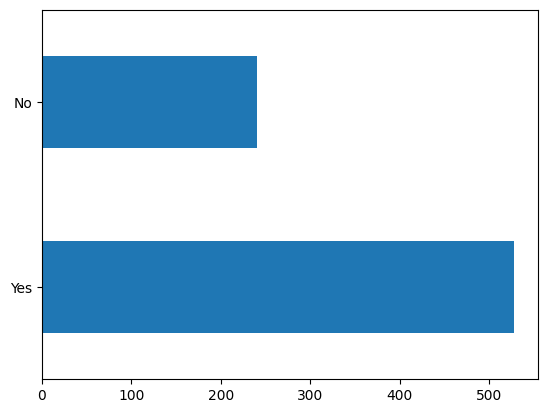

In [244]:
data['Churn'].value_counts().plot(kind='barh')

In [245]:
data['Churn'].value_counts()

Yes    528
No     240
Name: Churn, dtype: int64

In [246]:
data['Churn'].value_counts()[0] 
data['Churn'].value_counts()[1]


240

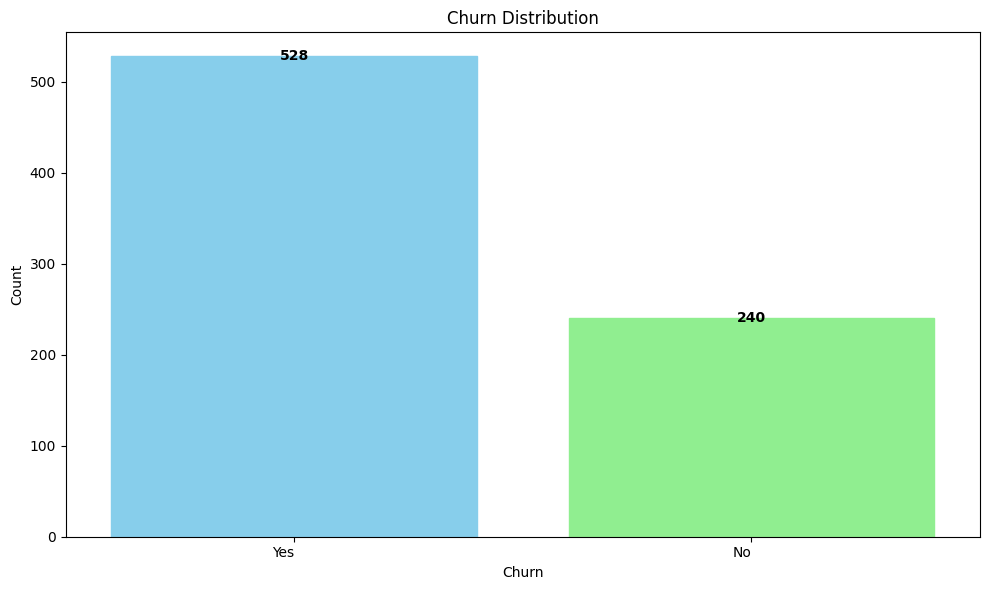

In [247]:
# Get the value counts of the 'Churn' column
churn_counts = data['Churn'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=churn_counts.index, y=churn_counts.values)

# Set color for each bar
colors = ['skyblue', 'lightgreen']
for i, bar in enumerate(barplot.patches):
    bar.set_color(colors[i % len(colors)])

# Add labels to the bars
for i, v in enumerate(churn_counts.values):
    plt.text(i, v, f'{v}', color='black', va='center', ha='center', fontweight='bold', fontsize=10)

plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()

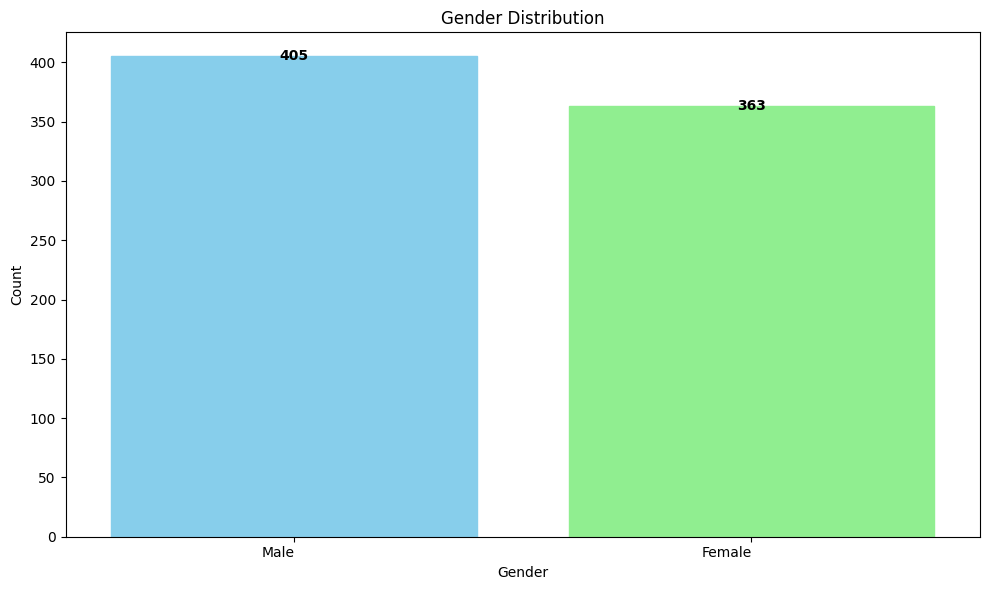

In [248]:
# Get the value counts of the 'Gender' column
gender_counts = data['Gender'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=gender_counts.index, y=gender_counts.values)

# Set color for each bar
colors = ['skyblue', 'lightgreen']
for i, bar in enumerate(barplot.patches):
    bar.set_color(colors[i % len(colors)])

# Add labels to the bars
for i, v in enumerate(gender_counts.values):
    plt.text(i, v, f'{v}', color='black', va='center', ha='center', fontweight='bold', fontsize=10)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()

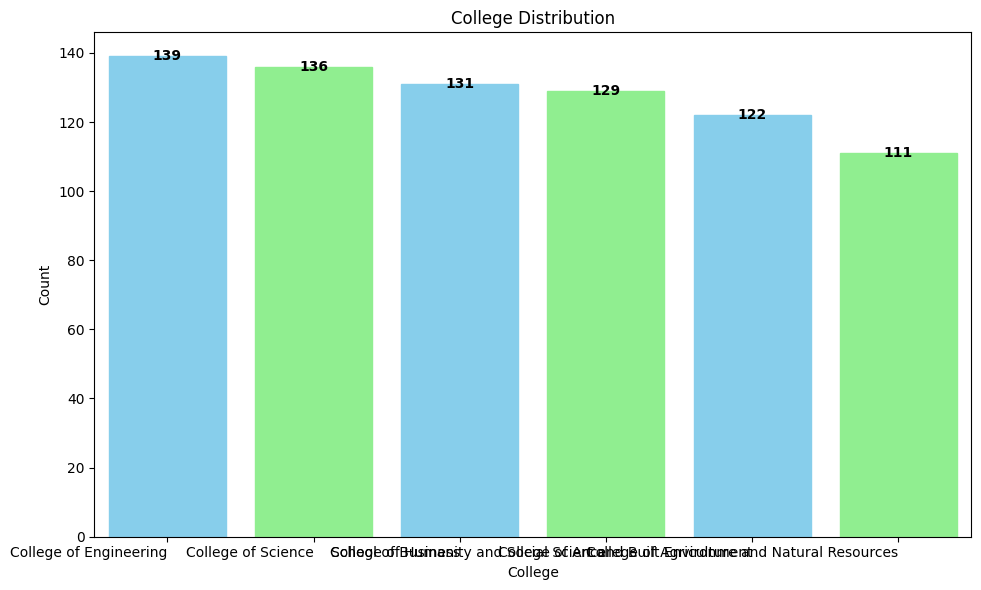

In [249]:
# Get the value counts of the 'Gender' column
college_counts = data['College'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=college_counts.index, y=college_counts.values)

# Set color for each bar
colors = ['skyblue', 'lightgreen']
for i, bar in enumerate(barplot.patches):
    bar.set_color(colors[i % len(colors)])

# Add labels to the bars
for i, v in enumerate(college_counts.values):
    plt.text(i, v, f'{v}', color='black', va='center', ha='center', fontweight='bold', fontsize=10)

plt.xlabel('College')
plt.ylabel('Count')
plt.title('College Distribution')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()

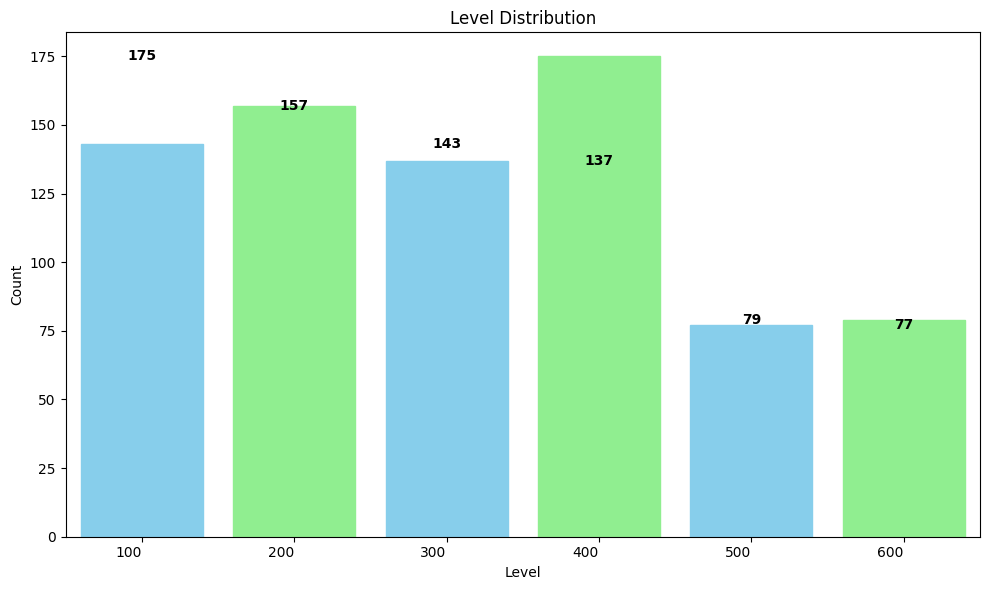

In [250]:
# Get the value counts of the 'Level' column
level_counts = data['Level'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=level_counts.index, y=level_counts.values)

# Set color for each bar
colors = ['skyblue', 'lightgreen']
for i, bar in enumerate(barplot.patches):
    bar.set_color(colors[i % len(colors)])

# Add labels to the bars
for i, v in enumerate(level_counts.values):
    plt.text(i, v, f'{v}', color='black', va='center', ha='center', fontweight='bold', fontsize=10)

plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Level Distribution')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()

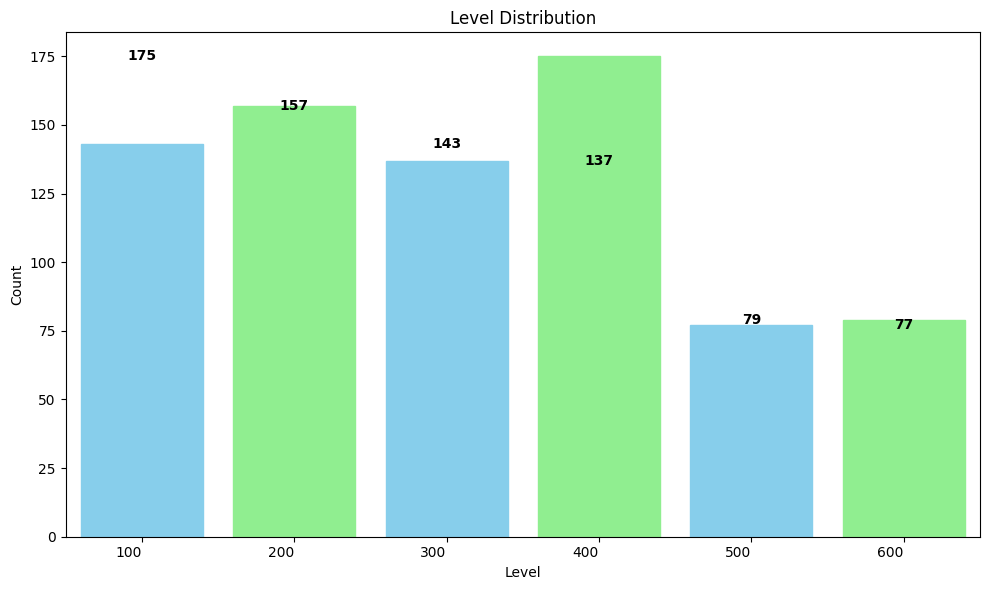

In [251]:
# Get the value counts of the 'Level' column
residence_counts = data['Level'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=residence_counts.index, y=residence_counts.values)

# Set color for each bar
colors = ['skyblue', 'lightgreen']
for i, bar in enumerate(barplot.patches):
    bar.set_color(colors[i % len(colors)])

# Add labels to the bars
for i, v in enumerate(residence_counts.values):
    plt.text(i, v, f'{v}', color='black', va='center', ha='center', fontweight='bold', fontsize=10)

plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Level Distribution')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()

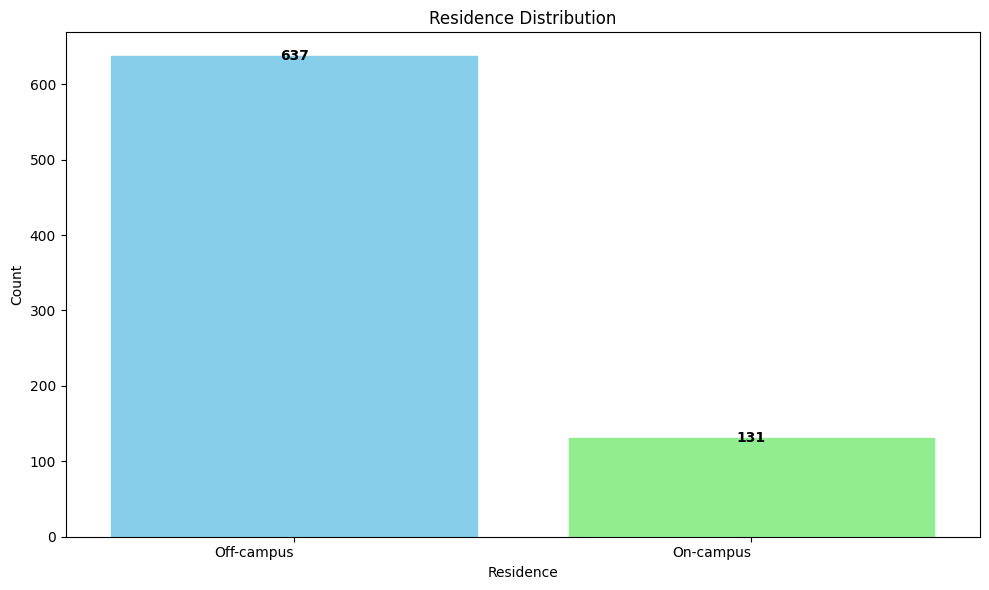

In [252]:
# Get the value counts of the 'Residence' column
residence_counts = data['Residence'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=residence_counts.index, y=residence_counts.values)

# Set color for each bar
colors = ['skyblue', 'lightgreen']
for i, bar in enumerate(barplot.patches):
    bar.set_color(colors[i % len(colors)])

# Add labels to the bars
for i, v in enumerate(residence_counts.values):
    plt.text(i, v, f'{v}', color='black', va='center', ha='center', fontweight='bold', fontsize=10)

plt.xlabel('Residence')
plt.ylabel('Count')
plt.title('Residence Distribution')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()

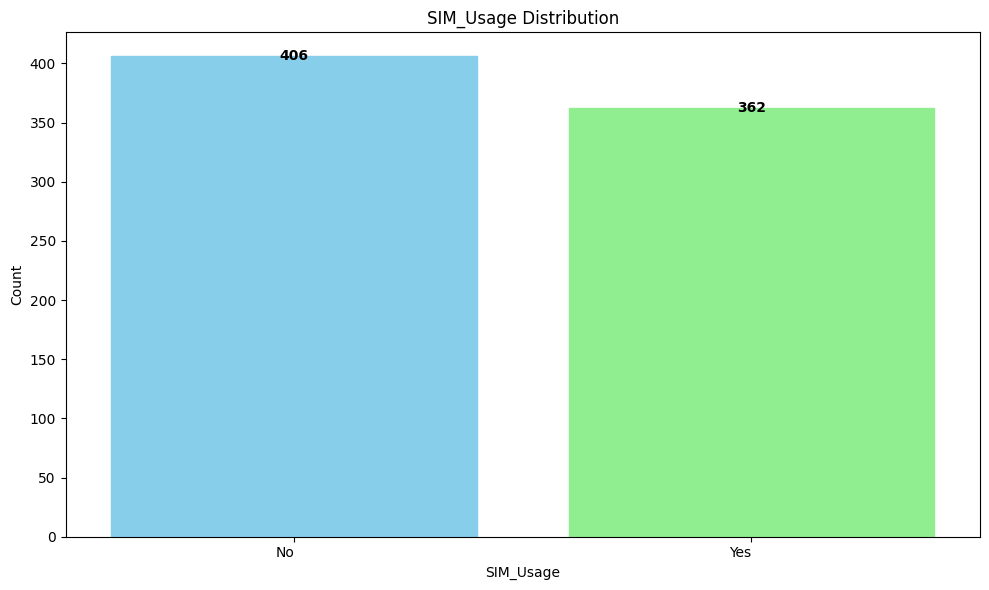

In [253]:
# Get the value counts of the 'SIM_Usage' column
sim_usage_counts = data['SIM_Usage'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=sim_usage_counts.index, y=sim_usage_counts.values)

# Set color for each bar
colors = ['skyblue', 'lightgreen']
for i, bar in enumerate(barplot.patches):
    bar.set_color(colors[i % len(colors)])

# Add labels to the bars
for i, v in enumerate(sim_usage_counts.values):
    plt.text(i, v, f'{v}', color='black', va='center', ha='center', fontweight='bold', fontsize=10)

plt.xlabel('SIM_Usage')
plt.ylabel('Count')
plt.title('SIM_Usage Distribution')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()

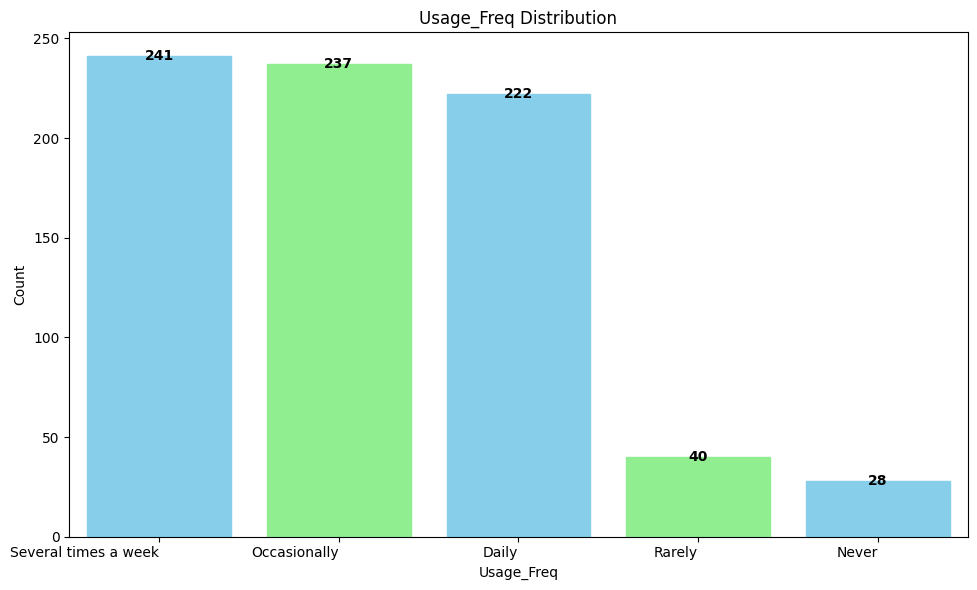

In [254]:
# Get the value counts of the 'Usage_Freq' column
usage_freq_counts = data['Usage_Freq'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=usage_freq_counts.index, y=usage_freq_counts.values)

# Set color for each bar
colors = ['skyblue', 'lightgreen']
for i, bar in enumerate(barplot.patches):
    bar.set_color(colors[i % len(colors)])

# Add labels to the bars
for i, v in enumerate(usage_freq_counts.values):
    plt.text(i, v, f'{v}', color='black', va='center', ha='center', fontweight='bold', fontsize=10)

plt.xlabel('Usage_Freq')
plt.ylabel('Count')
plt.title('Usage_Freq Distribution')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()

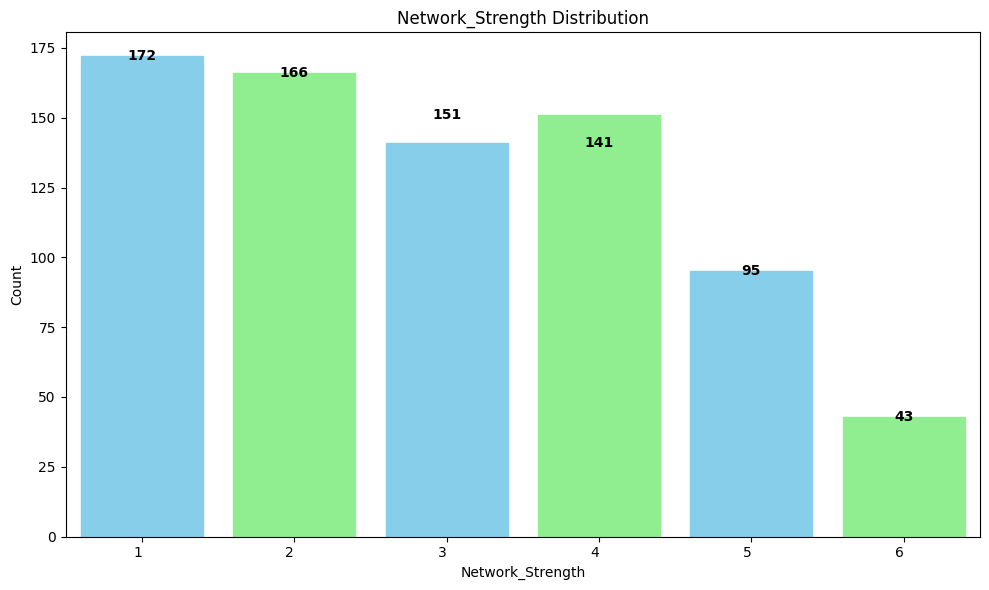

In [255]:
# Get the value counts of the 'Network_Strength' column
network_strength_counts = data['Network_Strength'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=network_strength_counts.index, y=network_strength_counts.values)

# Set color for each bar
colors = ['skyblue', 'lightgreen']
for i, bar in enumerate(barplot.patches):
    bar.set_color(colors[i % len(colors)])

# Add labels to the bars
for i, v in enumerate(network_strength_counts.values):
    plt.text(i, v, f'{v}', color='black', va='center', ha='center', fontweight='bold', fontsize=10)

plt.xlabel('Network_Strength')
plt.ylabel('Count')
plt.title('Network_Strength Distribution')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()

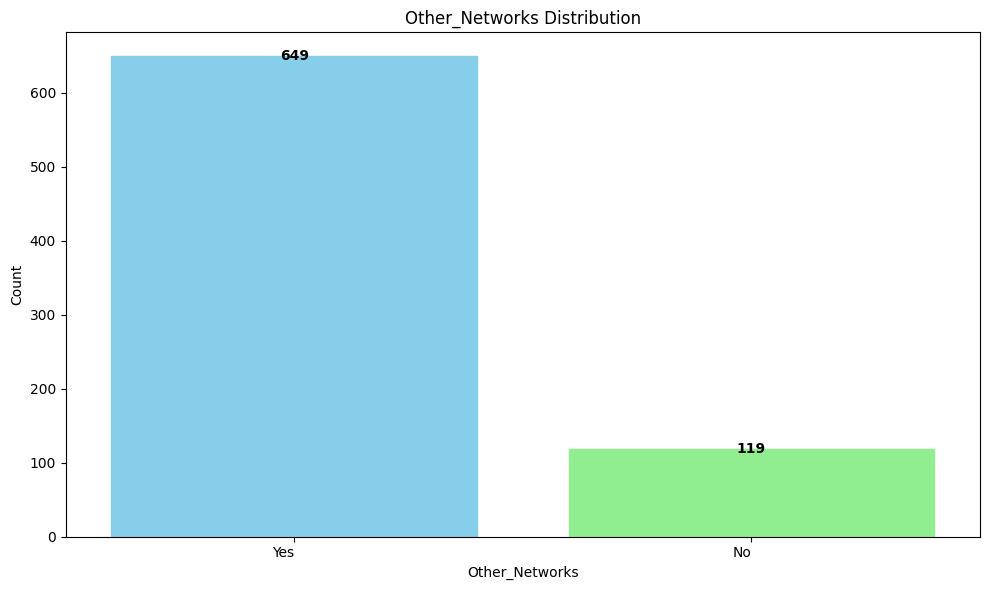

In [256]:
# Get the value counts of the 'Other_Networks' column
data_exhaustion_counts = data['Other_Networks'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=data_exhaustion_counts.index, y=data_exhaustion_counts.values)

# Set color for each bar
colors = ['skyblue', 'lightgreen']
for i, bar in enumerate(barplot.patches):
    bar.set_color(colors[i % len(colors)])

# Add labels to the bars
for i, v in enumerate(data_exhaustion_counts.values):
    plt.text(i, v, f'{v}', color='black', va='center', ha='center', fontweight='bold', fontsize=10)

plt.xlabel('Other_Networks')
plt.ylabel('Count')
plt.title('Other_Networks Distribution')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()

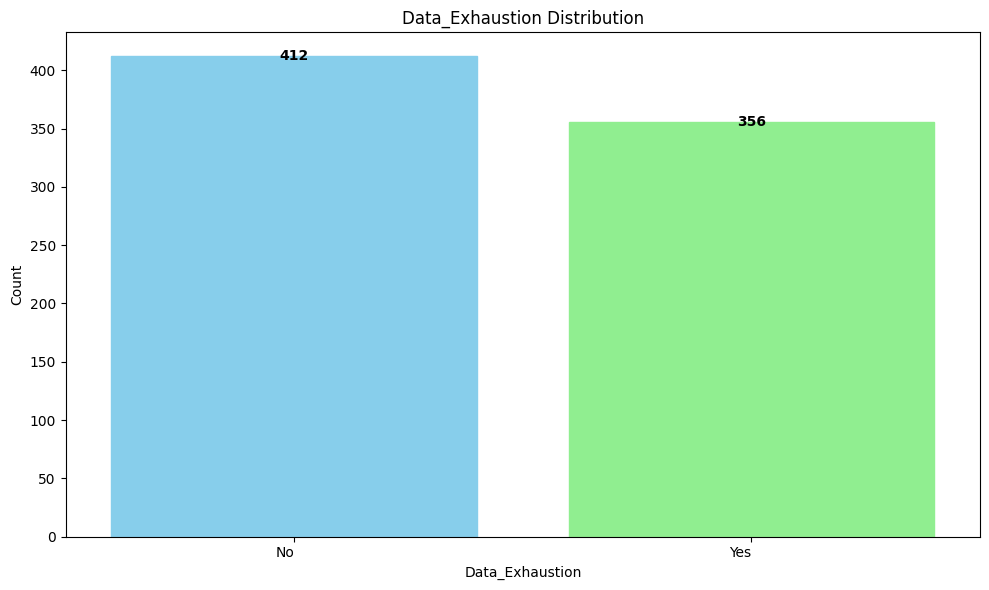

In [257]:
# Get the value counts of the 'Data_Exhaustion' column
data_exhaustion_counts = data['Data_Exhaustion'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=data_exhaustion_counts.index, y=data_exhaustion_counts.values)

# Set color for each bar
colors = ['skyblue', 'lightgreen', '']
for i, bar in enumerate(barplot.patches):
    bar.set_color(colors[i % len(colors)])

# Add labels to the bars
for i, v in enumerate(data_exhaustion_counts.values):
    plt.text(i, v, f'{v}', color='black', va='center', ha='center', fontweight='bold', fontsize=10)

plt.xlabel('Data_Exhaustion')
plt.ylabel('Count')
plt.title('Data_Exhaustion Distribution')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the chart
plt.show()

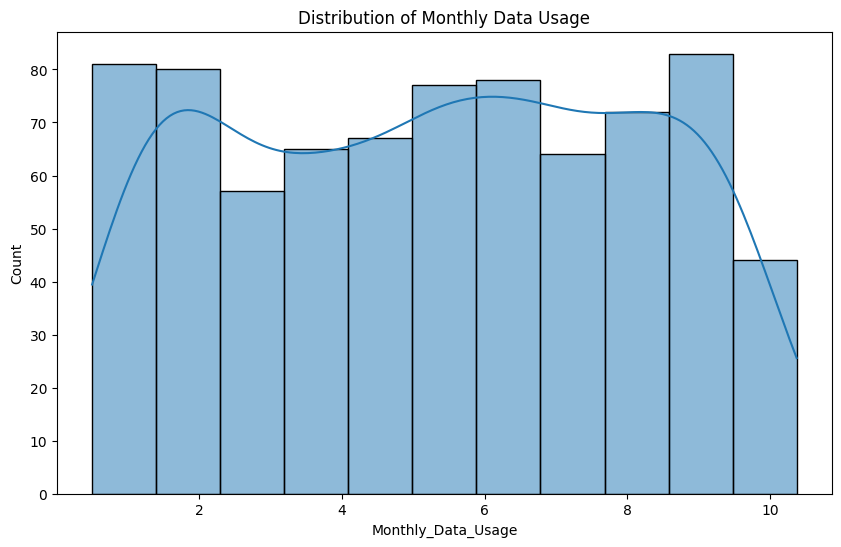

In [258]:
# Visualize the distribution of 'Monthly_Data_Usage'
plt.figure(figsize=(10, 6))
sns.histplot(data['Monthly_Data_Usage'], kde=True)
plt.title('Distribution of Monthly Data Usage')
plt.show()

In [259]:
# Create a DataFrame to store the encoded values
encoded_values = pd.DataFrame(columns=['Feature', 'Category', 'Encoded Value'])

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each categorical feature
for feature in categorical_features:
    # Fit the LabelEncoder on the current feature and transform the data
    data[feature] = le.fit_transform(data[feature])
    
    # Get the encoded values for the current feature
    for category, encoded_value in zip(le.classes_, le.transform(le.classes_)):
        # Create a temporary DataFrame to hold the current row
        temp_df = pd.DataFrame([{'Feature': feature, 'Category': category, 'Encoded Value': encoded_value}])
        
        # Append the temporary DataFrame to the main DataFrame
        encoded_values = pd.concat([encoded_values, temp_df], ignore_index=True)


In [260]:
# Display the encoded values
encoded_values

,Feature,Category,Encoded Value
0,Gender,Female,0
1,Gender,Male,1
2,College,College of Agriculture and Natural Resources,0
3,College,College of Art and Built Environment,1
4,College,College of Engineering,2
...,...,...,...
147,Reasons_Discontinue,"Unsatisfactory customer service, Poor network ...",60
148,Reasons_Discontinue,"Unsatisfactory customer service, Poor network ...",61
149,Reasons_Discontinue,"Unsatisfactory customer service, Poor network ...",62
150,Reasons_Discontinue,"Unsatisfactory customer service, Poor network ...",63


In [261]:
# Now your data is ready for machine learning algorithms
data.head()

,Gender,College,Churn,Level,Residence,SIM_Usage,Usage_Freq,Network_Strength,Services_Used,Data_Exhaustion,Other_Networks,Reasons_Discontinue,Monthly_Data_Usage
0,0,5,0,400,0,1,2,3,48,1,1,55,1.820
1,1,0,0,400,0,1,0,6,34,1,1,16,6.640
2,0,3,1,200,1,0,4,3,51,1,1,5,2.050
3,1,4,1,100,0,1,0,2,53,0,1,0,8.560
4,0,3,1,400,0,1,2,4,32,1,1,11,6.060


In [262]:
# Splitting the data into training and test sets
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing completed!")

Data preprocessing completed!


In [263]:
X

,Gender,College,Level,Residence,SIM_Usage,Usage_Freq,Network_Strength,Services_Used,Data_Exhaustion,Other_Networks,Reasons_Discontinue,Monthly_Data_Usage
0,0,5,400,0,1,2,3,48,1,1,55,1.820
1,1,0,400,0,1,0,6,34,1,1,16,6.640
2,0,3,200,1,0,4,3,51,1,1,5,2.050
3,1,4,100,0,1,0,2,53,0,1,0,8.560
4,0,3,400,0,1,2,4,32,1,1,11,6.060
...,...,...,...,...,...,...,...,...,...,...,...,...
763,1,4,200,0,0,4,2,16,1,1,1,4.190
764,1,0,100,1,0,0,4,25,0,0,56,8.600
765,0,0,600,0,0,0,2,17,0,1,55,7.540
766,1,1,300,0,0,1,6,27,0,1,33,3.360


In [264]:
y

0      0
1      0
2      1
3      1
4      1
      ..
763    1
764    1
765    0
766    1
767    1
Name: Churn, Length: 768, dtype: int32

In [265]:
# Initialize the models
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
svm = SVC(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
nn = MLPClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)

# List of models
models = [lr,rf,knn, svm, gb, nn, lgbm]

# Define the hyperparameters for each model
hyperparameters = {
    'LogisticRegression': {
        'C': uniform(0.1, 10),
        'penalty': ['l1', 'l2']
    },
    'RandomForestClassifier': {
        'n_estimators': randint(50, 200),
       'max_depth': randint(1, 10)
    },
    'KNeighborsClassifier': {
        'n_neighbors': randint(1, 10)
    },
    'SVC': {
        'C': uniform(0.1, 10),
        'gamma': uniform(0.001, 1)
    },
    'GradientBoostingClassifier': {
        'n_estimators': randint(50, 200),
       'max_depth': randint(1, 10),
        'learning_rate': uniform(0.01, 0.3)
    },
    'MLPClassifier': {
        'hidden_layer_sizes': (randint(10, 100).rvs(), randint(10, 100).rvs()),
        'alpha': uniform(0.0001, 0.1)
    },
    'LGBMClassifier': {
        'n_estimators': randint(50, 200),
       'max_depth': randint(1, 10),
        'learning_rate': uniform(0.01, 0.3)
    }
}

# Perform a randomized search for each model
for model in models:
    model_name = model.__class__.__name__
    print(f"\nTuning {model_name}...")
    
    # Initialize a RandomizedSearchCV object
    rs = RandomizedSearchCV(model, hyperparameters[model_name], n_iter=10, cv=5, random_state=42, n_jobs=-1)
    
    # Fit the RandomizedSearchCV object to the data
    rs.fit(X_train, y_train)
    
    # Print the best parameters and the best score
    print(f"Best parameters: {rs.best_params_}")
    print(f"Best score: {rs.best_score_}")


Tuning LogisticRegression...


d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-pac

Best parameters: {'C': 3.4370861113902182, 'penalty': 'l2'}
Best score: 0.6921897907503665

Tuning RandomForestClassifier...
Best parameters: {'max_depth': 3, 'n_estimators': 124}
Best score: 0.6970678395308543

Tuning KNeighborsClassifier...
Best parameters: {'n_neighbors': 7}
Best score: 0.6579501532720246

Tuning SVC...
Best parameters: {'C': 1.6601864044243653, 'gamma': 0.15699452033620265}
Best score: 0.7003198720511795

Tuning GradientBoostingClassifier...
Best parameters: {'learning_rate': 0.010233629752304298, 'max_depth': 5, 'n_estimators': 107}
Best score: 0.682407037185126

Tuning MLPClassifier...
Best parameters: {'alpha': 0.00017787658410143285, 'hidden_layer_sizes': 78}
Best score: 0.6889377582300413

Tuning LGBMClassifier...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_le

In [266]:
# Perform a randomized search for each model
for model in models:
    model_name = model.__class__.__name__
    print(f"\nTuning {model_name}...")
    
    # Initialize a RandomizedSearchCV object
    rs = RandomizedSearchCV(model, hyperparameters[model_name], n_iter=10, cv=5, random_state=42, n_jobs=-1)
    
    # Fit the RandomizedSearchCV object to the data
    rs.fit(X_train, y_train)
    
    # Print the best parameters and the best score
    print(f"Best parameters: {rs.best_params_}")
    print(f"Best score: {rs.best_score_}")
    
    # Make predictions on the test set
    y_pred = rs.best_estimator_.predict(X_test)
    
    # Print the confusion matrix
    print(f"Confusion matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Tuning LogisticRegression...


d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-pac

Best parameters: {'C': 3.4370861113902182, 'penalty': 'l2'}
Best score: 0.6921897907503665
Confusion matrix for LogisticRegression:
[[  0  54]
 [  0 100]]



Tuning RandomForestClassifier...
Best parameters: {'max_depth': 3, 'n_estimators': 124}
Best score: 0.6970678395308543
Confusion matrix for RandomForestClassifier:
[[  0  54]
 [  0 100]]



Tuning KNeighborsClassifier...
Best parameters: {'n_neighbors': 7}
Best score: 0.6579501532720246
Confusion matrix for KNeighborsClassifier:
[[ 6 48]
 [12 88]]



Tuning SVC...
Best parameters: {'C': 1.6601864044243653, 'gamma': 0.15699452033620265}
Best score: 0.7003198720511795
Confusion matrix for SVC:
[[ 0 54]
 [ 1 99]]



Tuning GradientBoostingClassifier...
Best parameters: {'learning_rate': 0.010233629752304298, 'max_depth': 5, 'n_estimators': 107}
Best score: 0.682407037185126
Confusion matrix for GradientBoostingClassifier:
[[ 0 54]
 [ 2 98]]



Tuning MLPClassifier...
Best parameters: {'alpha': 0.00017787658410143285, 'hidden_layer_si

In [269]:
# confusion matrix for each model
for model in models:
    model_name = model.__class__.__name__
    print(f"\nTuning {model_name}...")
    
    # Initialize a RandomizedSearchCV object
    rs = RandomizedSearchCV(model, hyperparameters[model_name], n_iter=10, cv=5, random_state=42, n_jobs=-1)
    
    # Fit the RandomizedSearchCV object to the data
    rs.fit(X_train, y_train)
    
    # Print the best parameters and the best score
    print(f"Best parameters: {rs.best_params_}")
    print(f"Best score: {rs.best_score_}")
    
    # Make predictions on the test set
    y_pred = rs.best_estimator_.predict(X_test)
    
    # Print the confusion matrix
    print(f"Confusion matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")
    
    # Print the classification report
    print(f"Classification report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("\n")


Tuning LogisticRegression...


d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-pac

Best parameters: {'C': 3.4370861113902182, 'penalty': 'l2'}
Best score: 0.6921897907503665
Confusion matrix for LogisticRegression:
[[  0  54]
 [  0 100]]


Classification report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.65      1.00      0.79       100

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154




Tuning RandomForestClassifier...


d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Best parameters: {'max_depth': 3, 'n_estimators': 124}
Best score: 0.6970678395308543
Confusion matrix for RandomForestClassifier:
[[  0  54]
 [  0 100]]


Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.65      1.00      0.79       100

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154




Tuning KNeighborsClassifier...


d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Best parameters: {'n_neighbors': 7}
Best score: 0.6579501532720246
Confusion matrix for KNeighborsClassifier:
[[ 6 48]
 [12 88]]


Classification report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.33      0.11      0.17        54
           1       0.65      0.88      0.75       100

    accuracy                           0.61       154
   macro avg       0.49      0.50      0.46       154
weighted avg       0.54      0.61      0.54       154




Tuning SVC...
Best parameters: {'C': 1.6601864044243653, 'gamma': 0.15699452033620265}
Best score: 0.7003198720511795
Confusion matrix for SVC:
[[ 0 54]
 [ 1 99]]


Classification report for SVC:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.65      0.99      0.78       100

    accuracy                           0.64       154
   macro avg       0.32      0.49      0.39       154
weighted avg       0.42


Tuning LogisticRegression...


d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-pac

Best parameters: {'C': 3.4370861113902182, 'penalty': 'l2'}
Best score: 0.6921897907503665
Confusion matrix for LogisticRegression:
[[  0  54]
 [  0 100]]


Classification report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.65      1.00      0.79       100

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154





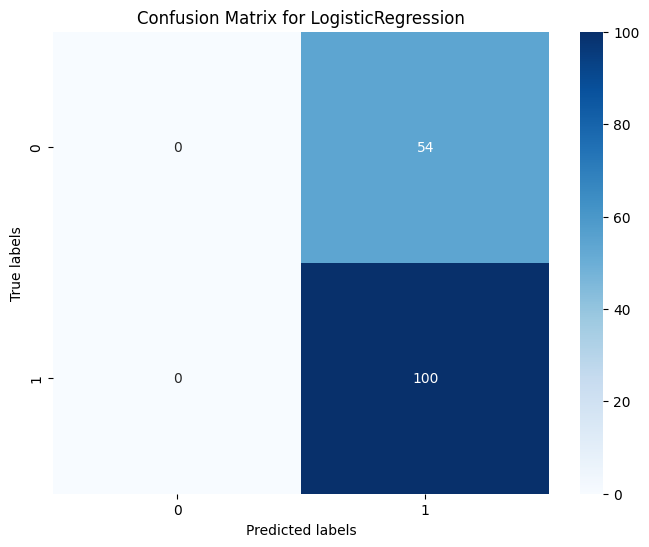


Tuning RandomForestClassifier...
Best parameters: {'max_depth': 3, 'n_estimators': 124}
Best score: 0.6970678395308543
Confusion matrix for RandomForestClassifier:
[[  0  54]
 [  0 100]]


Classification report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.65      1.00      0.79       100

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154





d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\DEV WORK\Data Science Library\ML-For-Beginners\.venv\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

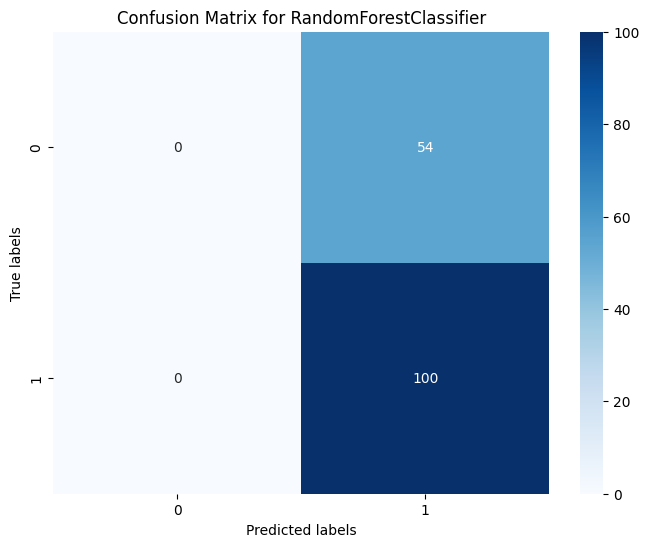


Tuning KNeighborsClassifier...
Best parameters: {'n_neighbors': 7}
Best score: 0.6579501532720246
Confusion matrix for KNeighborsClassifier:
[[ 6 48]
 [12 88]]


Classification report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.33      0.11      0.17        54
           1       0.65      0.88      0.75       100

    accuracy                           0.61       154
   macro avg       0.49      0.50      0.46       154
weighted avg       0.54      0.61      0.54       154





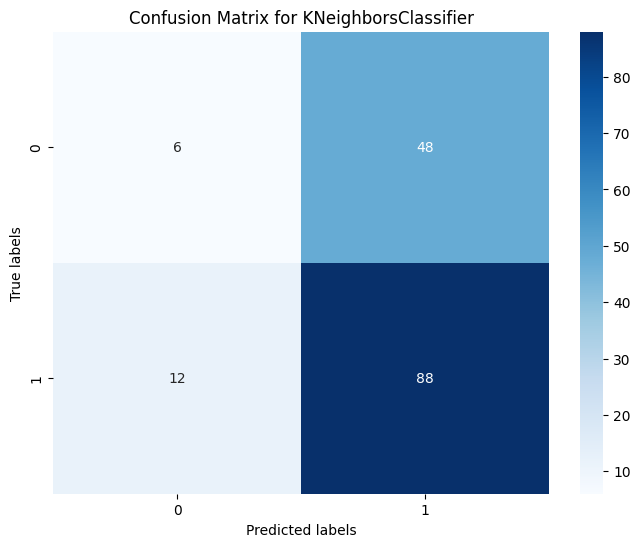


Tuning SVC...
Best parameters: {'C': 1.6601864044243653, 'gamma': 0.15699452033620265}
Best score: 0.7003198720511795
Confusion matrix for SVC:
[[ 0 54]
 [ 1 99]]


Classification report for SVC:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.65      0.99      0.78       100

    accuracy                           0.64       154
   macro avg       0.32      0.49      0.39       154
weighted avg       0.42      0.64      0.51       154





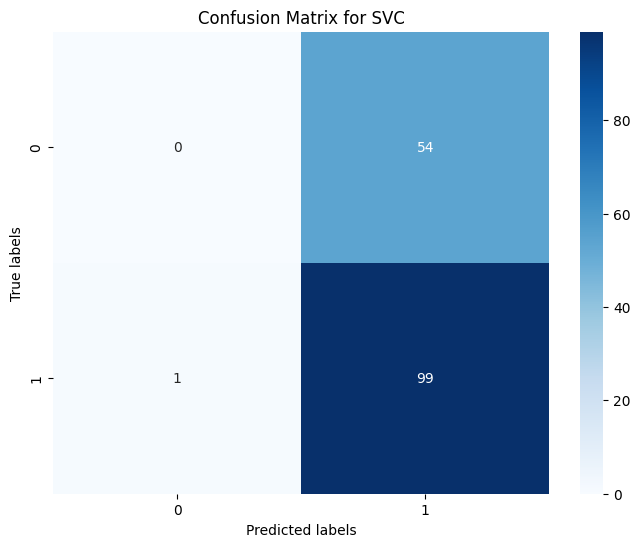


Tuning GradientBoostingClassifier...
Best parameters: {'learning_rate': 0.010233629752304298, 'max_depth': 5, 'n_estimators': 107}
Best score: 0.682407037185126
Confusion matrix for GradientBoostingClassifier:
[[ 0 54]
 [ 2 98]]


Classification report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.64      0.98      0.78       100

    accuracy                           0.64       154
   macro avg       0.32      0.49      0.39       154
weighted avg       0.42      0.64      0.51       154





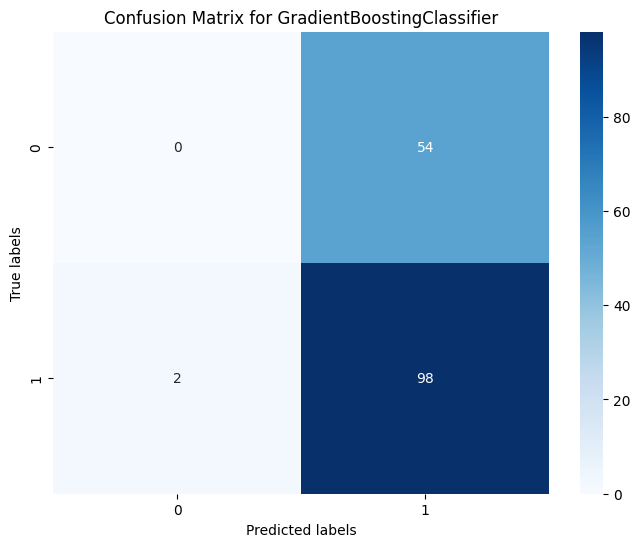


Tuning MLPClassifier...
Best parameters: {'alpha': 0.00017787658410143285, 'hidden_layer_sizes': 78}
Best score: 0.6889377582300413
Confusion matrix for MLPClassifier:
[[ 2 52]
 [ 4 96]]


Classification report for MLPClassifier:
              precision    recall  f1-score   support

           0       0.33      0.04      0.07        54
           1       0.65      0.96      0.77       100

    accuracy                           0.64       154
   macro avg       0.49      0.50      0.42       154
weighted avg       0.54      0.64      0.53       154





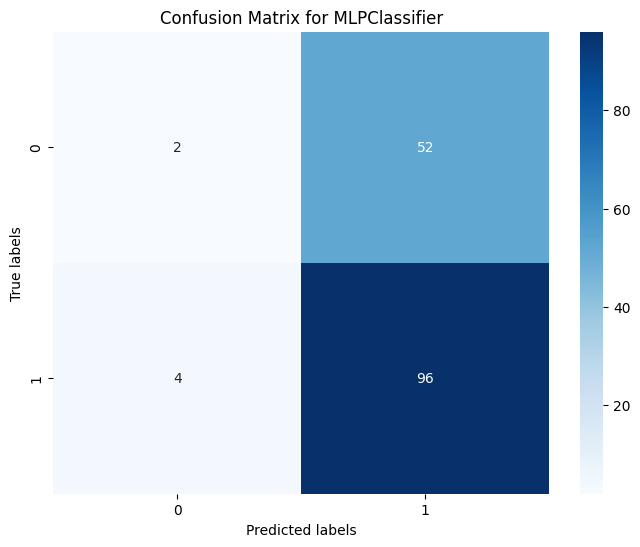


Tuning LGBMClassifier...
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 428, number of negative: 186
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.697068 -> initscore=0.833377
[LightGBM] [Info] Start training from score 0.833377
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

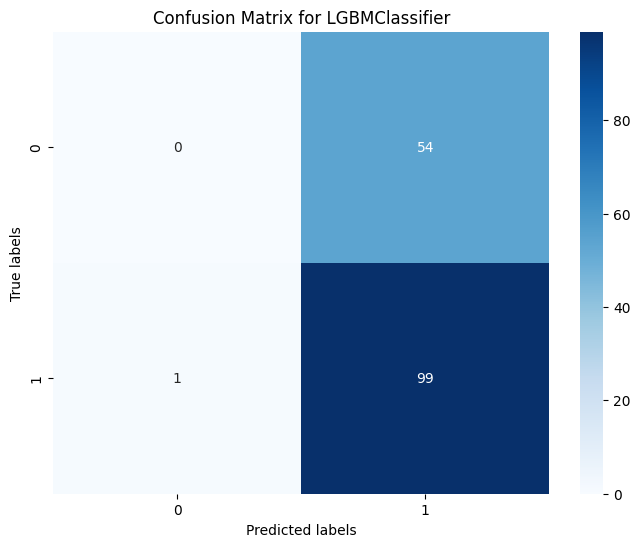

In [270]:
# plot the confusion matrix for each model
for model in models:
    model_name = model.__class__.__name__
    print(f"\nTuning {model_name}...")
    
    # Initialize a RandomizedSearchCV object
    rs = RandomizedSearchCV(model, hyperparameters[model_name], n_iter=10, cv=5, random_state=42, n_jobs=-1)
    
    # Fit the RandomizedSearchCV object to the data
    rs.fit(X_train, y_train)
    
    # Print the best parameters and the best score
    print(f"Best parameters: {rs.best_params_}")
    print(f"Best score: {rs.best_score_}")
    
    # Make predictions on the test set
    y_pred = rs.best_estimator_.predict(X_test)
    
    # Print the confusion matrix
    print(f"Confusion matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")
    
    # Print the classification report
    print(f"Classification report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print("\n")
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()